In [1]:
# install.packages("ggplot2", repos="http://cran.us.r-project.org")

In [2]:
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [3]:
Data <- read.csv("/Users/Amardeep/Documents/Semester_2/Dic/lab_2/June_10-July_12_CSV.csv")
head(Data)

psraid,sample,int_date,lang,usr,cregion,state,form,sex,q1,⋯,ideo,hisp,birth_hisp,race,inc,ql1a,qc1,zipcode,weight,standwt
100006,1,61015,1,S,3,51,1,2,1,⋯,1,2,NA,1,99,NA,NA,20112,2.258065,0.7209406
100009,1,61015,1,U,3,24,2,2,2,⋯,3,2,NA,2,6,NA,NA,21239,2.548387,0.8136330
100011,1,61015,1,S,2,39,2,2,1,⋯,1,2,NA,1,3,NA,NA,44730,1.806452,0.5767525
100039,1,61015,1,S,3,37,2,2,1,⋯,2,2,NA,1,6,NA,NA,27028,5.032258,1.6066676
100040,1,61015,1,U,3,21,1,2,1,⋯,1,2,NA,1,3,2,NA,40511,7.161290,2.2864116
100043,1,62215,1,R,2,20,1,2,1,⋯,3,2,NA,1,8,NA,NA,67601,1.000000,0.3192737


Loads data in a Data Frame. Please provide the absolute path and the correct name of the pew dataset csv file.

In [4]:
library(RSQLite)
# Sys.setlocale('LC_ALL','C')
con <- dbConnect(SQLite(), dbname="/Users/Amardeep/Documents/Semester_2/Dic/lab_2/CSV_data")
# dbWriteTable(con, "all_data1", Data, append= TRUE)

## Q1 Find the Internet usage per gender.

In [5]:
gender_internet <- dbGetQuery(con, "SELECT sex FROM `all_data1` WHERE EMINUSE = '1'")
gender_internet <- gender_internet %>% count(sex, sort = TRUE)
#Find counts of people who use internet, grouped by gender

head(gender_internet)

sex,n
2,847
1,823


Plot Bargraph from the data

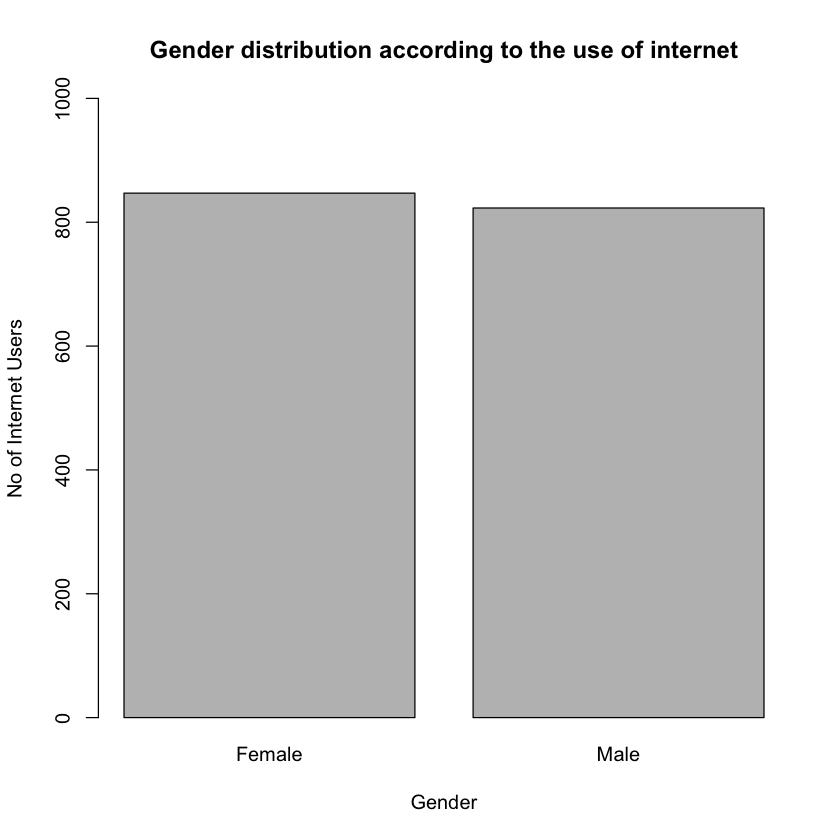

In [6]:
barplot(gender_internet$n, main="Gender distribution according to the use of internet", xlab="Gender",
        ylab="No of Internet Users", names.arg=c("Female","Male"), ylim=c(0,1000))

## Q2 How does the Marital status of a person vary with Age (Married, Unmarried)

In [7]:
age_marry <- dbGetQuery(con, "SELECT AGE FROM `all_data1` WHERE MARITAL = '1' and AGE < '98'")
age_never_marry <- dbGetQuery(con, "SELECT AGE FROM `all_data1` WHERE MARITAL = '6' and AGE < '98'")
age_marry <- age_marry %>% count(age, sort = TRUE)
# Find Number of Married people grouped by age

age_never_marry <- age_never_marry %>% count(age, sort = TRUE)
# Find Number of Unmarried people grouped by age

colnames(age_marry) <- c("Age", "Married_People")
colnames(age_never_marry) <- c("Age", "Unmarried_People")
age_marry <- age_marry %>% inner_join(age_never_marry, by = "Age")
head(age_marry)

Age,Married_People,Unmarried_People
60,40,6
53,34,5
55,29,5
61,29,7
72,28,3
50,26,9


Plot Line plot from the Data using ggplot2

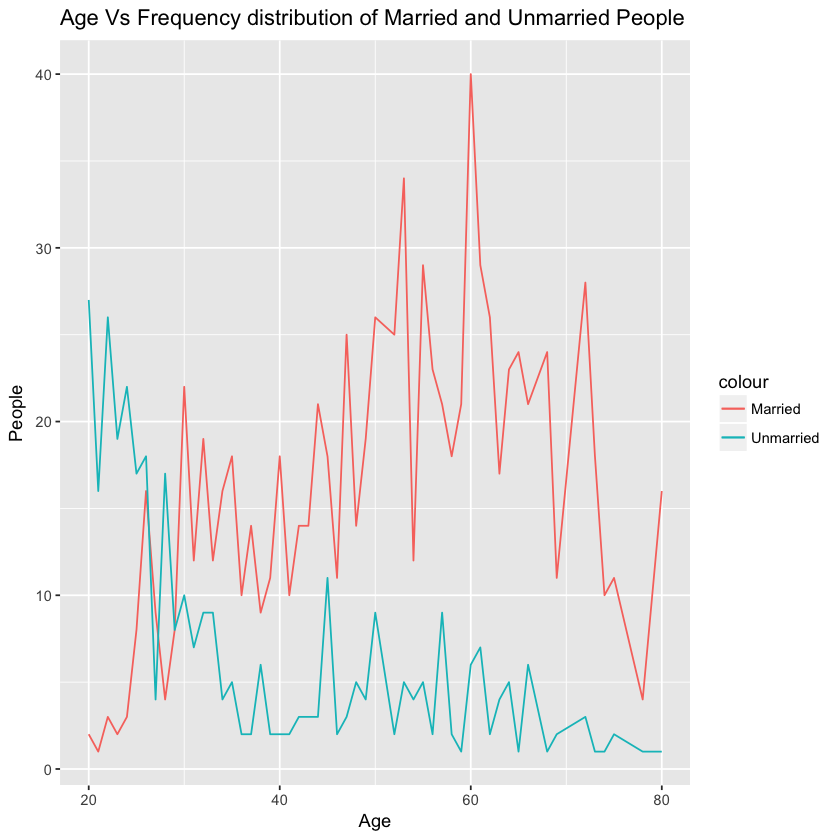

In [8]:
# ggplot() + 
# geom_line(data=age_marry, aes(x=Age, y=People), color='green') + 
# geom_line(data=age_never_marry, aes(x=Age, y=People), color='red')

ggplot(data = age_marry, aes(x = Age)) +
  geom_line(aes(y = Married_People, colour = "Married")) +
  geom_line(aes(y = Unmarried_People, colour = "Unmarried")) + xlab("Age") +
  ylab("People") + ggtitle("Age Vs Frequency distribution of Married and Unmarried People")

## Q3 How does the Political party support vary with age?

In [9]:
republican_age <- dbGetQuery(con, "SELECT AGE FROM `all_data1` WHERE PARTY = '1' and AGE < '98'")
republican_age <- republican_age %>% count(age, sort = TRUE)
colnames(republican_age) <- c("Age", "Republican_Supporters")
# Find Number of Republican Supoorters grouped by age

democrat_age <- dbGetQuery(con, "SELECT AGE FROM `all_data1` WHERE PARTY = '2' and AGE < '98'")
democrat_age <- democrat_age %>% count(age, sort = TRUE)
colnames(democrat_age) <- c("Age", "Democrat_Supporters")
# Find Number of Democrat Supoorters grouped by age

republican_age <- republican_age %>% inner_join(democrat_age, by = "Age")
head(republican_age)

Age,Republican_Supporters,Democrat_Supporters
67,15,12
53,14,14
56,13,18
60,13,18
72,12,13
80,12,8


Plot Line plot from the Data using ggplot2

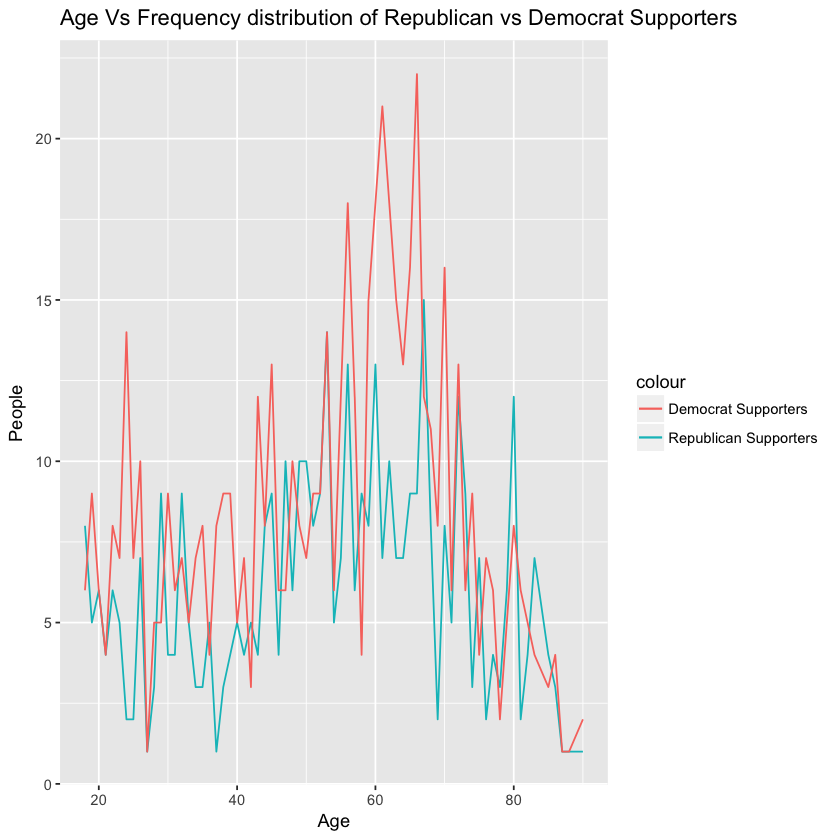

In [10]:
ggplot(data = republican_age, aes(x = Age)) +
  geom_line(aes(y = Republican_Supporters, colour = "Republican Supporters")) +
  geom_line(aes(y = Democrat_Supporters, colour = "Democrat Supporters")) + xlab("Age") +
  ylab("People") + ggtitle("Age Vs Frequency distribution of Republican vs Democrat Supporters")

## Q4 Which race has maximum number of people having Bachelors or higher education?

In [11]:
race_degree <- dbGetQuery(con, "SELECT RACE FROM `all_data1` WHERE EDUC2 < '9' and EDUC2 > '5' and RACE < '6'")
race_degree <- race_degree %>% count(race, sort = TRUE)
colnames(race_degree) <- c("Race", "People")

head(race_degree)

Race,People
1,655
2,75
3,31
4,17
5,8


Plot Bar Graph from the data

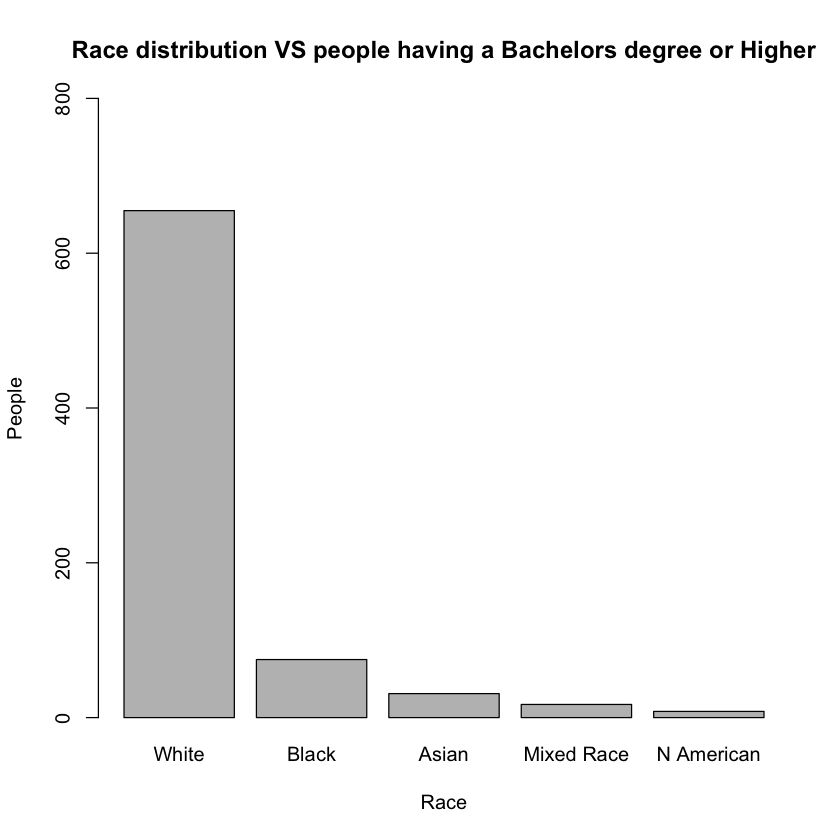

In [12]:
barplot(race_degree$People, main="Race distribution VS people having a Bachelors degree or Higher", xlab="Race",
        ylab="People", names.arg=c("White","Black","Asian","Mixed Race","N American"), ylim=c(0,800))

It is very easy to Observe that White Race has most people having Bachelors degree or Higher. Also N American stands for Native American.

## Q5 How does the tendency to play games vary with age? 

In [16]:
gamer_age <- dbGetQuery(con, "SELECT AGE FROM `all_data1` WHERE GAME4 = '1' and AGE < '98'")
gamer_age <- gamer_age %>% count(age, sort = TRUE)
colnames(gamer_age) <- c("Age", "Gamers")
# Find Number of Frequent Gamers grouped by age

no_gamer_age <- dbGetQuery(con, "SELECT AGE FROM `all_data1` WHERE GAME4 = '2' and AGE < '98'")
no_gamer_age <- no_gamer_age %>% count(age, sort = TRUE)
colnames(no_gamer_age) <- c("Age", "Non_gamers")
# Find Number of Non Frequent Gamers grouped by age

never_gamer_age <- dbGetQuery(con, "SELECT AGE FROM `all_data1` WHERE GAME1 = '2' and AGE < '98'")
never_gamer_age <- never_gamer_age %>% count(age, sort = TRUE)
colnames(never_gamer_age) <- c("Age", "Never_gamers")
# Find Number of People who never played games grouped by age

gamer_age <- gamer_age %>% inner_join(no_gamer_age, by = "Age")
gamer_age <- gamer_age %>% inner_join(never_gamer_age, by = "Age")
head(gamer_age)

Age,Gamers,Non_gamers,Never_gamers
26,10,17,13
19,9,11,7
20,8,10,11
23,8,10,7
18,6,10,7
22,6,17,9


Plotting the line plot using ggplot2.

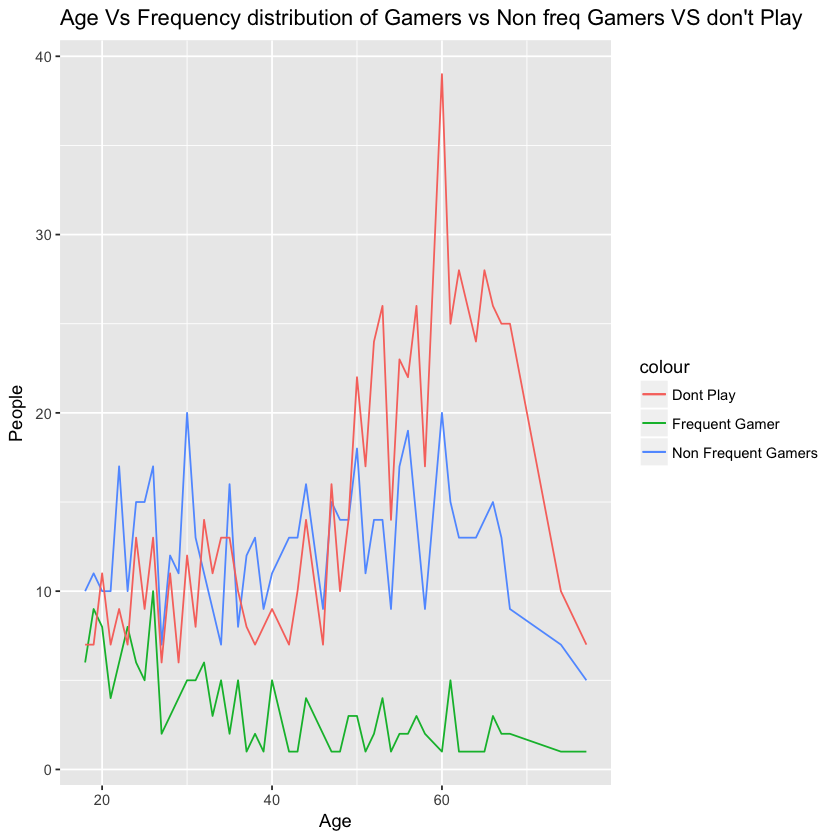

In [20]:
ggplot(data = gamer_age, aes(x = Age)) +
  geom_line(aes(y = Gamers, colour = "Frequent Gamer")) +
  geom_line(aes(y = Non_gamers, colour = "Non Frequent Gamers")) + 
geom_line(aes(y = Never_gamers, colour = "Dont Play")) + xlab("Age") +
  ylab("People") + ggtitle("Age Vs Frequency distribution of Gamers vs Non freq Gamers VS don't Play")